In [1]:
!pip install scikit_learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Load dataset

In [3]:
#Import dataset
#data = pd.read_csv('recipe_site_traffic_2212.csv')
data = pd.read_csv('/content/recipe_site_traffic_2212.csv')
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [4]:
# Ontain Descriptive statistics
data.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


## Part 1: Pre-processing

In [6]:
# Count the number of missing values
data.isnull().sum()

,0
recipe,0
calories,52
carbohydrate,52
sugar,52
protein,52
category,0
servings,0
high_traffic,373


### Categorical Encoding

In [7]:
# identify uniques category's values
data['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [8]:
data.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [9]:
# Reconcile the semantically the same servings' values
data['servings'] = data['servings'].replace(['4 as a snack'], ['4'])
data['servings'] = data['servings'].replace(['6 as a snack'], ['6'])

In [10]:
data['servings'].unique()

array(['6', '4', '1', '2'], dtype=object)

<Axes: ylabel='Frequency'>

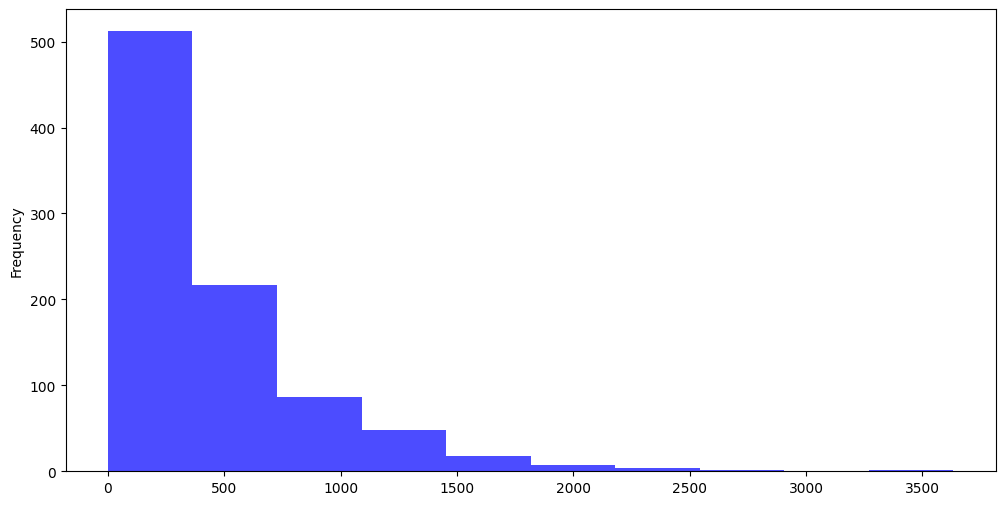

In [11]:
# Plot the histogram of the calories feature
plt.figure(figsize = (20, 15))

data['calories'].plot.hist(bins = 10, color = 'b', alpha = 0.7, figsize = (12, 6))


<Axes: ylabel='Frequency'>

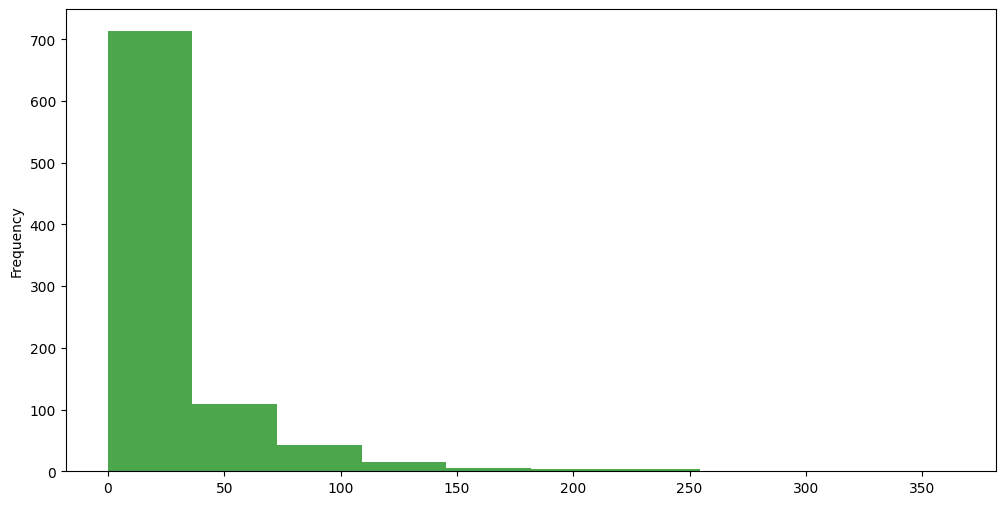

In [12]:
# Plot the histogram of the returns
plt.figure(figsize = (20, 15))

data['protein'].plot.hist(bins = 10, color = 'g', alpha = 0.7, figsize = (12, 6))

In [13]:
dummies = pd.get_dummies(data[['category', 'servings']])
dummies = dummies.astype(int)
dummies.head()

,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [14]:
data = pd.concat([data, dummies], axis=1)
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,category_Beverages,category_Breakfast,...,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,1,NaN,NaN,NaN,NaN,Pork,6,High,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,35.48,38.56,0.66,0.92,Potato,4,High,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,97.03,30.56,38.63,0.02,Beverages,4,High,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
data.drop('servings', axis=1, inplace=True)

In [16]:
data.drop('category', axis=1, inplace=True)
data.head()

,recipe,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,...,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,1,NaN,NaN,NaN,NaN,High,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,35.48,38.56,0.66,0.92,High,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,NaN,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,97.03,30.56,38.63,0.02,High,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,27.05,1.85,0.80,0.53,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
data.drop('recipe', axis=1, inplace=True)
data.head()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,NaN,NaN,NaN,NaN,High,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.48,38.56,0.66,0.92,High,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.28,42.68,3.09,2.88,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.03,30.56,38.63,0.02,High,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.05,1.85,0.80,0.53,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
y = data['high_traffic']
X = data.drop('high_traffic', axis=1)

In [19]:
X.head()

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.48,38.56,0.66,0.92,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.28,42.68,3.09,2.88,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.03,30.56,38.63,0.02,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.05,1.85,0.80,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
data.head()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,NaN,NaN,NaN,NaN,High,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.48,38.56,0.66,0.92,High,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.28,42.68,3.09,2.88,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.03,30.56,38.63,0.02,High,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.05,1.85,0.80,0.53,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:

numerical_cols = data.select_dtypes(include='number').columns
data_num = data[numerical_cols]
data_num

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.48,38.56,0.66,0.92,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.28,42.68,3.09,2.88,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.03,30.56,38.63,0.02,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.05,1.85,0.80,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1161.00,5.31,22.39,44.22,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
943,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
944,951.74,29.42,3.57,13.87,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
945,266.61,35.77,0.97,8.07,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Missing data imputation

In [22]:

#numerical_cols = data.select_dtypes(include='number').columns
desired_cols = ['calories', 'carbohydrate', 'sugar','protein']
numerical_cols = data.select_dtypes(include='number').columns
selected_numeric = [col for col in desired_cols if col in numerical_cols]


df_selected = data[selected_numeric]
# Initialize the KNNImputer (you can change n_neighbors as needed)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numerical data
#data_num_imputed = imputer.fit_transform(data_num)
data_num_imputed = imputer.fit_transform(df_selected)

# Convert the result back to a DataFrame
#data_imputed_df = pd.DataFrame(data_num_imputed, columns=numerical_cols, index=data.index)
data_imputed_df = pd.DataFrame(data_num_imputed, columns=desired_cols)
data_imputed_df

,calories,carbohydrate,sugar,protein
0,435.939196,35.069676,9.046547,24.149296
1,35.480000,38.560000,0.660000,0.920000
2,914.280000,42.680000,3.090000,2.880000
3,97.030000,30.560000,38.630000,0.020000
4,27.050000,1.850000,0.800000,0.530000
...,...,...,...,...
942,1161.000000,5.310000,22.390000,44.220000
943,435.939196,35.069676,9.046547,24.149296
944,951.740000,29.420000,3.570000,13.870000
945,266.610000,35.770000,0.970000,8.070000


In [23]:
data_imputed_df.isnull().sum()

,0
calories,0
carbohydrate,0
sugar,0
protein,0


In [24]:
for col in data_imputed_df:
    data[col] = data_imputed_df[col]

In [25]:
data

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,435.939196,35.069676,9.046547,24.149296,High,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.480000,38.560000,0.660000,0.920000,High,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.280000,42.680000,3.090000,2.880000,NaN,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.030000,30.560000,38.630000,0.020000,High,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.050000,1.850000,0.800000,0.530000,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1161.000000,5.310000,22.390000,44.220000,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
943,435.939196,35.069676,9.046547,24.149296,High,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
944,951.740000,29.420000,3.570000,13.870000,High,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
945,266.610000,35.770000,0.970000,8.070000,High,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [26]:
data['high_traffic'] = data['high_traffic'].isna().astype(int)

In [27]:
data

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.480000,38.560000,0.660000,0.920000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.280000,42.680000,3.090000,2.880000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.030000,30.560000,38.630000,0.020000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.050000,1.850000,0.800000,0.530000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1161.000000,5.310000,22.390000,44.220000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
943,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
944,951.740000,29.420000,3.570000,13.870000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
945,266.610000,35.770000,0.970000,8.070000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [28]:
data[['calories', 'carbohydrate','sugar', 'protein']].describe()

,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,947.000000,947.000000
mean,435.939196,35.069676,9.046547,24.149296
std,440.394131,42.724059,14.270029,35.356020
min,0.140000,0.030000,0.010000,0.000000
25%,114.410000,9.135000,1.795000,3.465000
50%,313.530000,23.170000,5.050000,12.120000
75%,576.225000,42.590000,9.285000,28.530000
max,3633.160000,530.420000,148.750000,363.360000


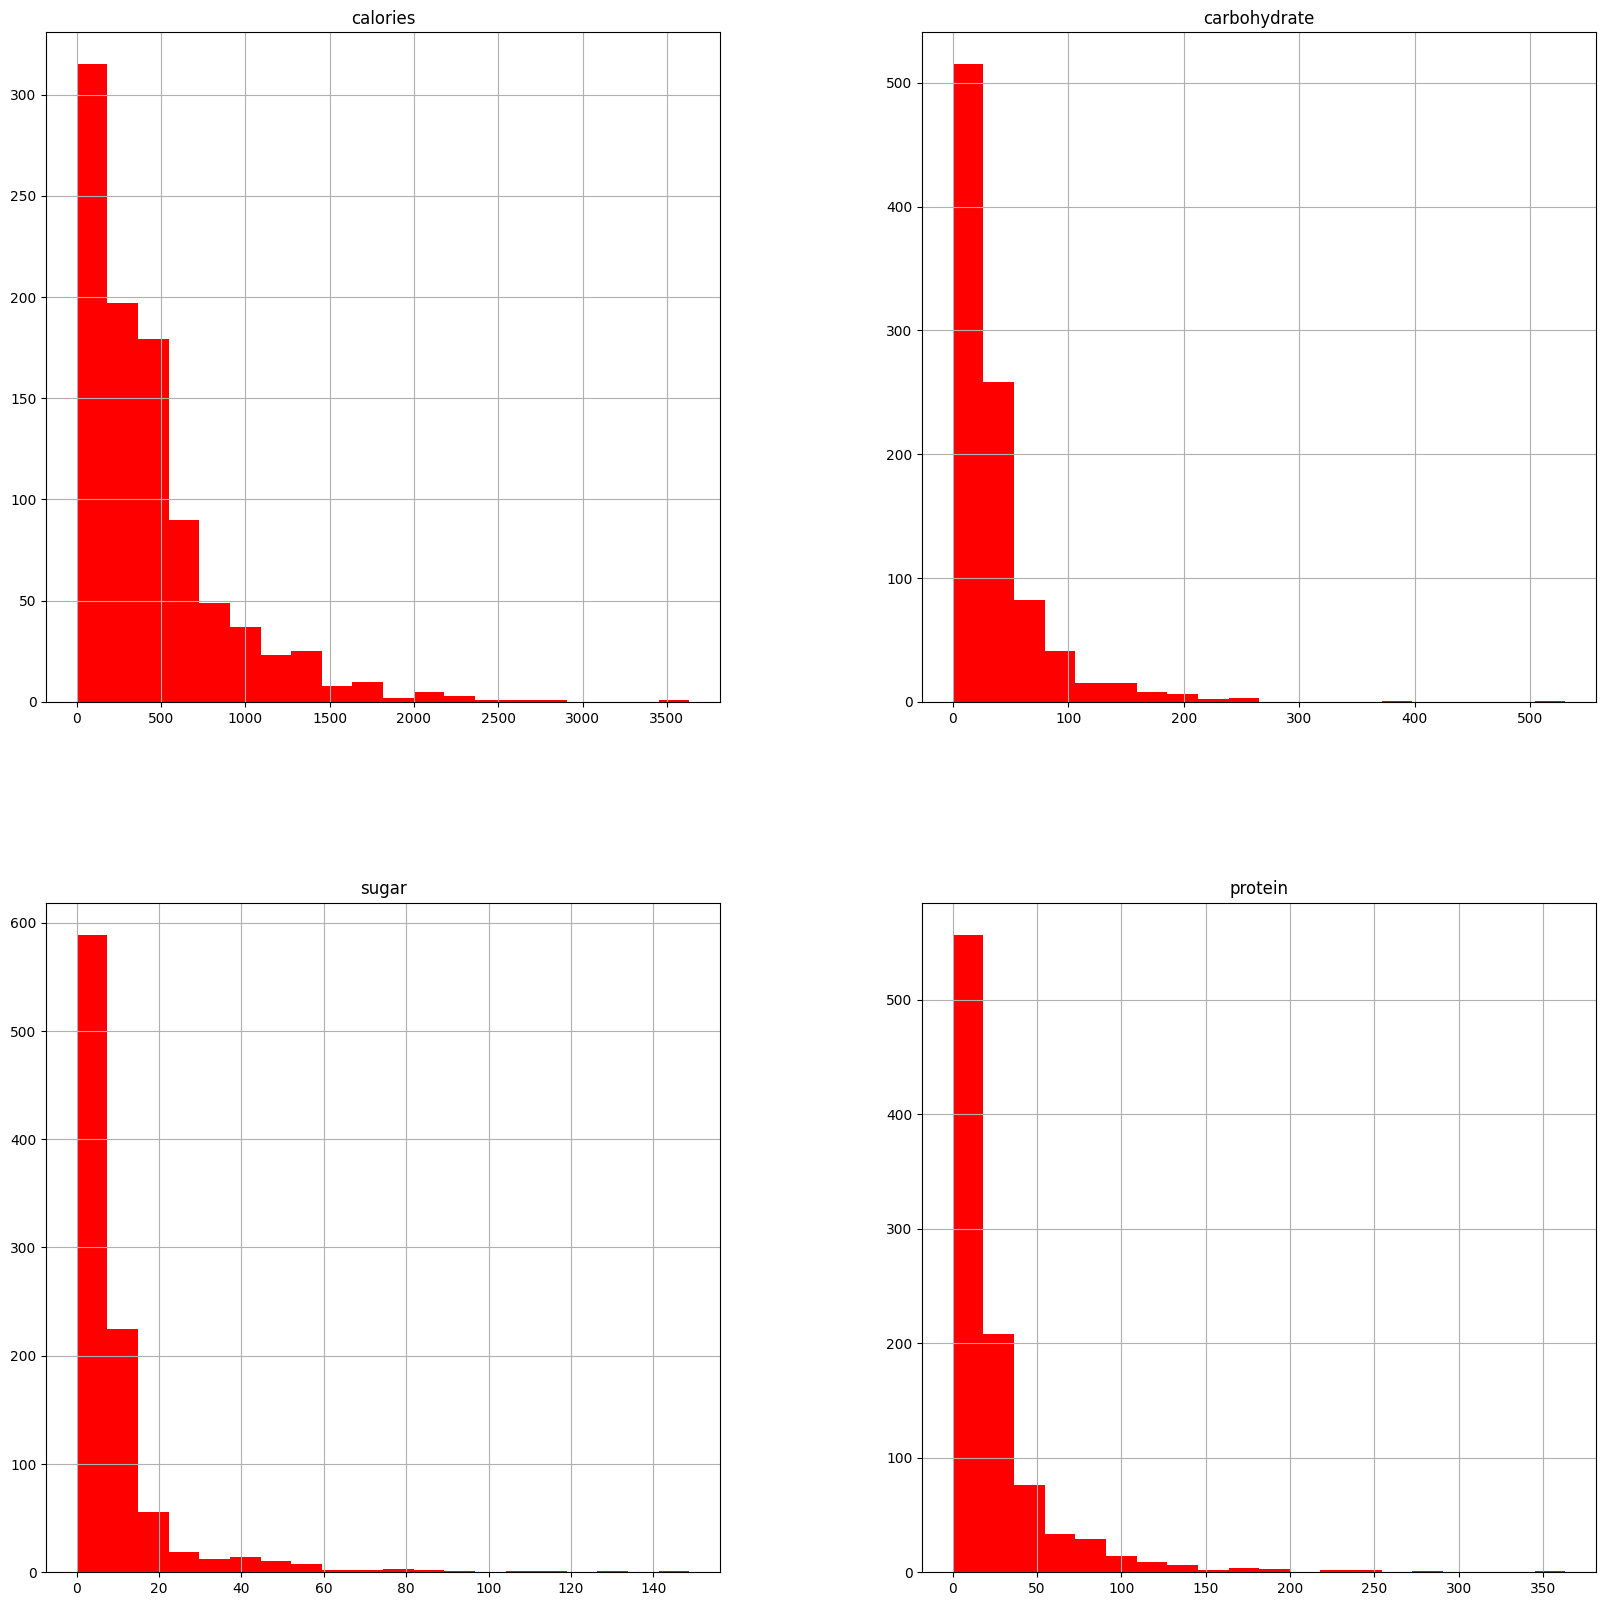

In [29]:
data[['calories', 'carbohydrate','sugar', 'protein']].hist(bins = 20, figsize = (20,20), color = 'r');
plt.show()

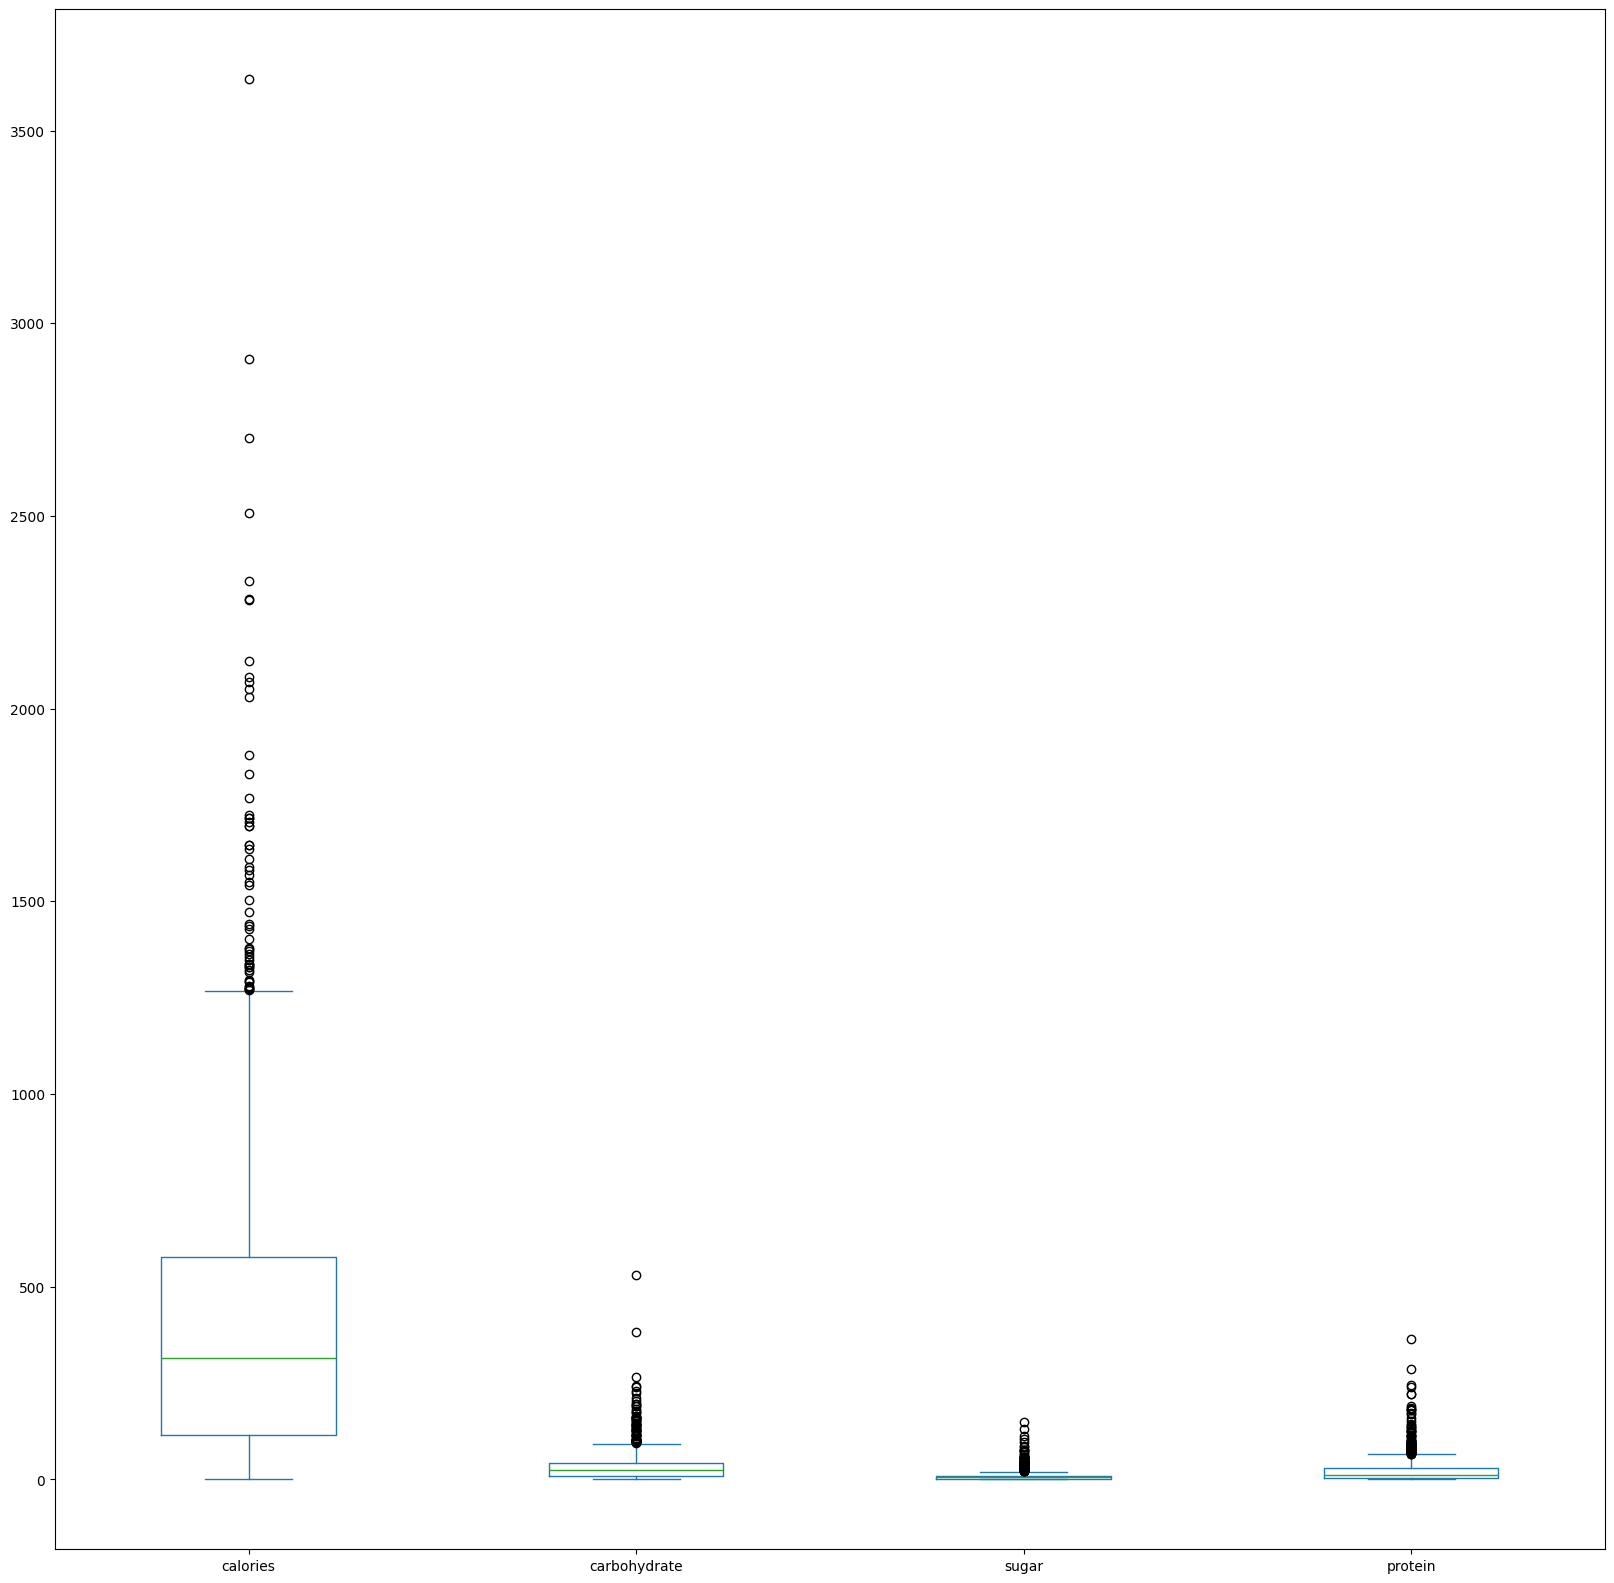

In [30]:
# Plot boxplot
data[['calories', 'carbohydrate','sugar', 'protein']].plot(kind='box', figsize=(20,20))
plt.show()

### Dealing with outliers

In [31]:
def outlier(df, columns):
    for col in columns:
        Q_1 = df[col].quantile(0.25)
        Q_3 = df[col].quantile(0.75)
        IQR = Q_3 - Q_1
        lower_lim = Q_1 - 1.5 * IQR
        upper_lim = Q_3 + 1.5 * IQR
        df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]
    return df



In [32]:
# Apply outlier
data_clean = outlier(data, desired_cols)
data_clean

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.480000,38.560000,0.660000,0.920000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.280000,42.680000,3.090000,2.880000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,27.050000,1.850000,0.800000,0.530000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,691.150000,3.460000,1.650000,53.930000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,186.210000,83.940000,1.980000,22.400000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
943,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
944,951.740000,29.420000,3.570000,13.870000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
945,266.610000,35.770000,0.970000,8.070000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


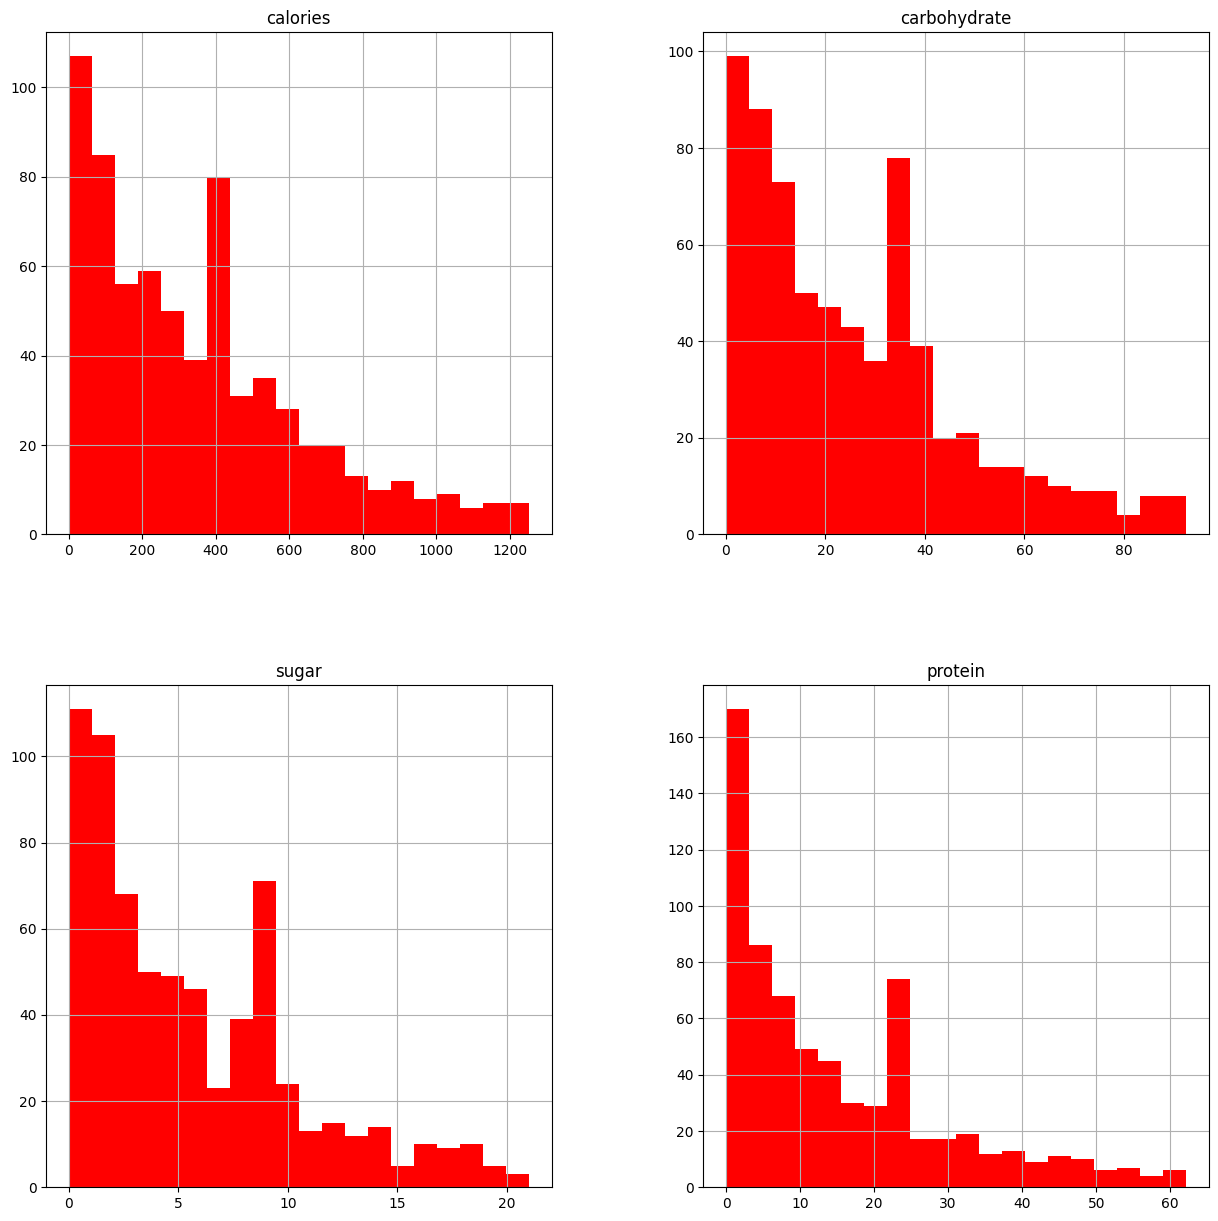

In [33]:
# View the effect of filtering outliers
data_clean[['calories', 'carbohydrate','sugar', 'protein']].hist(bins = 20, figsize = (15,15), color = 'r');
plt.show()

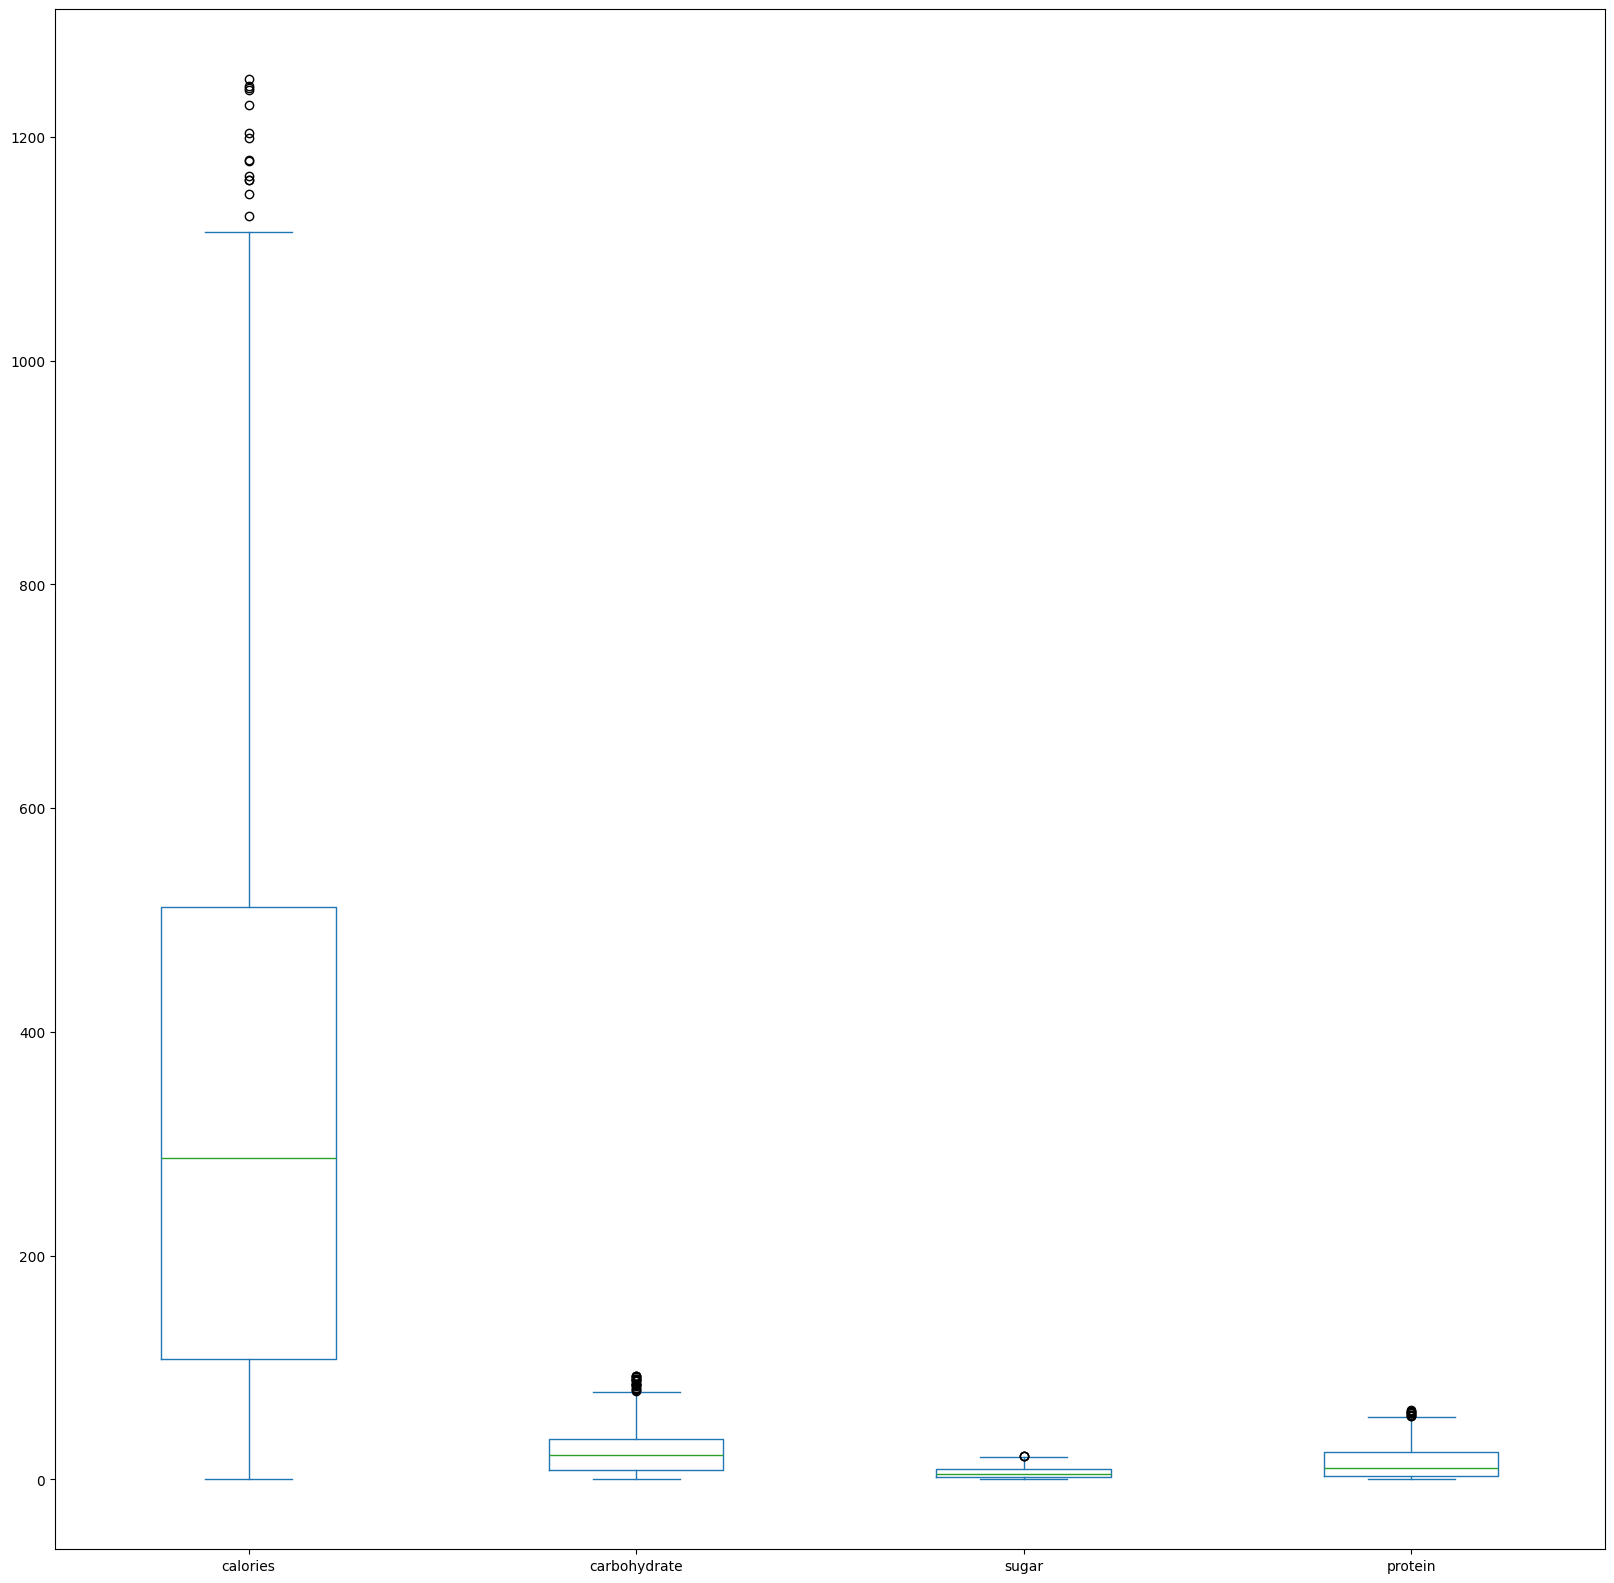

In [34]:
#plot Boxplot
data_clean[['calories', 'carbohydrate','sugar', 'protein']].plot(kind='box', figsize=(20,20))
plt.show()

In [35]:
data_clean.describe()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,353.149865,25.998538,5.635924,14.979272,0.392962,0.115836,0.123167,0.073314,0.085044,0.049853,0.104106,0.077713,0.071848,0.079179,0.107038,0.112903,0.174487,0.190616,0.425220,0.209677
std,291.710889,21.381811,4.810873,14.477945,0.488767,0.320263,0.328870,0.260842,0.279152,0.217802,0.305622,0.267915,0.258425,0.270216,0.309389,0.316707,0.379806,0.393075,0.494739,0.407377
min,0.300000,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.222500,8.247500,1.635000,3.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,287.010000,21.480000,4.365000,10.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,511.240000,36.430000,9.046547,24.149296,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1251.420000,92.440000,20.990000,62.080000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


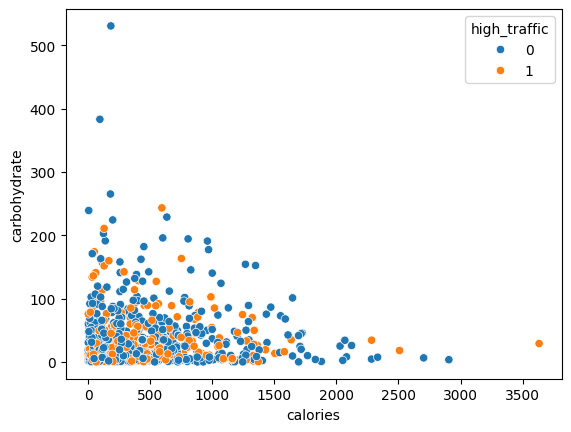

In [36]:
# Plot scatter plot between calories and carbohydrate
sns.scatterplot(x = 'calories', y = 'carbohydrate', hue = 'high_traffic', data = data);


In [37]:
data_clean.head()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.480000,38.560000,0.660000,0.920000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.280000,42.680000,3.090000,2.880000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,27.050000,1.850000,0.800000,0.530000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,691.150000,3.460000,1.650000,53.930000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


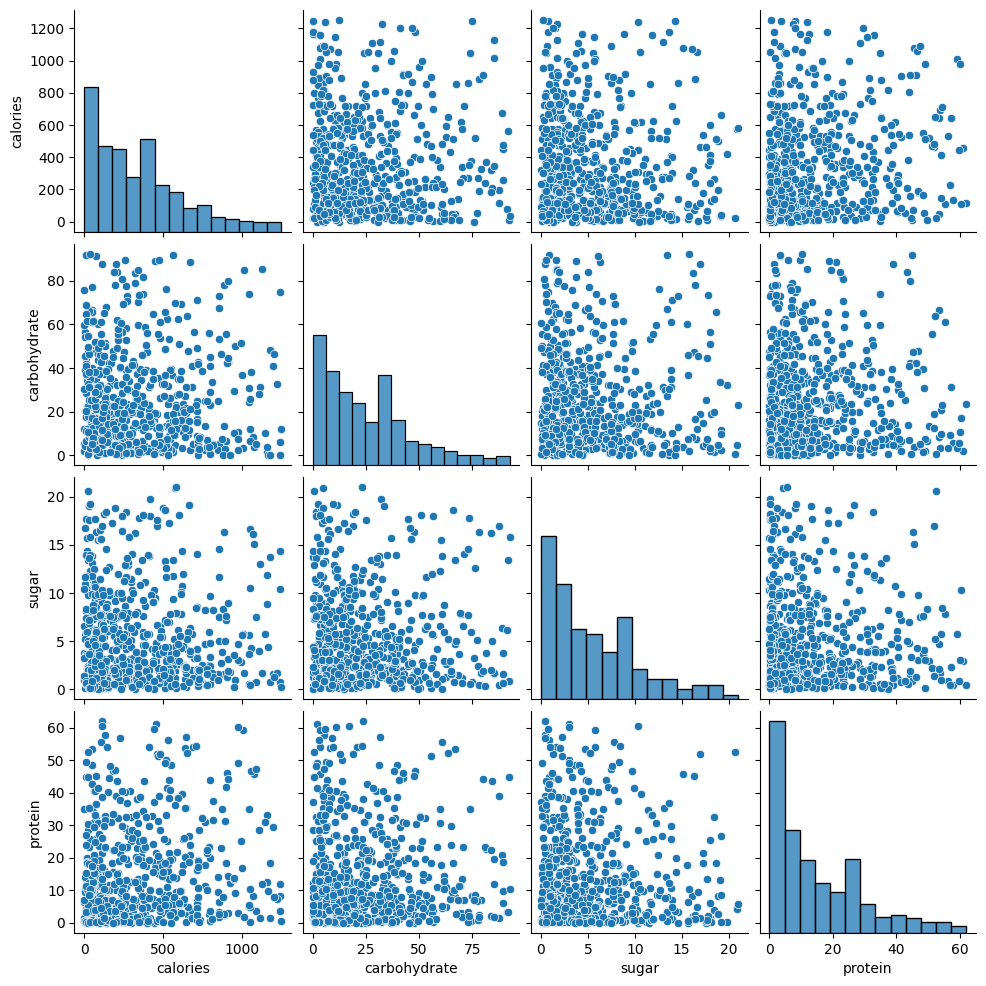

In [38]:
sns.pairplot(data_clean[['calories', 'carbohydrate','sugar', 'protein']])
plt.show()

In [39]:
data_clean[['calories', 'carbohydrate','sugar', 'protein','high_traffic']].corr()

,calories,carbohydrate,sugar,protein,high_traffic
calories,1.000000,0.008251,-0.026280,0.146550,-0.110399
carbohydrate,0.008251,1.000000,-0.006633,0.021289,-0.054414
sugar,-0.026280,-0.006633,1.000000,-0.049431,0.069080
protein,0.146550,0.021289,-0.049431,1.000000,-0.113543
high_traffic,-0.110399,-0.054414,0.069080,-0.113543,1.000000


In [40]:
data_before_split_y = data['high_traffic']
data_before_split_X = data.drop('high_traffic', axis = 1)
data_before_split_X

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
0,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,35.480000,38.560000,0.660000,0.920000,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,914.280000,42.680000,3.090000,2.880000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,97.030000,30.560000,38.630000,0.020000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,27.050000,1.850000,0.800000,0.530000,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1161.000000,5.310000,22.390000,44.220000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
943,435.939196,35.069676,9.046547,24.149296,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
944,951.740000,29.420000,3.570000,13.870000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
945,266.610000,35.770000,0.970000,8.070000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
# Correllation between features
data_clean.corr()

,calories,carbohydrate,sugar,protein,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
calories,1.000000,0.008251,-0.026280,0.146550,-0.110399,-0.235545,-0.103866,0.058471,0.032042,0.064186,0.083405,0.091698,0.094057,0.082880,0.063919,-0.142458,0.002797,0.003709,0.009427,-0.017634
carbohydrate,0.008251,1.000000,-0.006633,0.021289,-0.054414,-0.166607,0.046968,-0.055661,-0.073059,0.130960,0.098599,-0.019636,0.057416,0.006370,0.076984,-0.066144,0.010454,0.009782,0.039738,-0.067444
sugar,-0.026280,-0.006633,1.000000,-0.049431,0.069080,0.139998,0.029526,-0.004778,-0.047944,0.155624,-0.068597,-0.032232,0.000739,0.041040,-0.105365,-0.072286,0.011624,-0.012262,0.039836,-0.047385
protein,0.146550,0.021289,-0.049431,1.000000,-0.113543,-0.358736,-0.017795,0.174041,0.156422,-0.100800,-0.010199,0.179165,0.187219,0.171558,-0.127324,-0.147131,-0.032186,0.016403,0.053776,-0.051128
high_traffic,-0.110399,-0.054414,0.069080,-0.113543,1.000000,0.412347,0.210033,0.107714,0.109865,-0.018770,-0.018680,-0.098984,-0.049469,-0.191457,-0.230008,-0.277549,0.041430,0.029923,-0.017968,-0.045677
category_Beverages,-0.235545,-0.166607,0.139998,-0.358736,0.412347,1.000000,-0.135658,-0.101808,-0.110351,-0.082910,-0.123385,-0.105067,-0.100705,-0.106138,-0.125316,-0.129129,0.075035,-0.024013,-0.079631,0.049922
category_Breakfast,-0.103866,0.046968,0.029526,-0.017795,0.210033,-0.135658,1.000000,-0.105418,-0.114264,-0.085850,-0.127761,-0.108793,-0.104276,-0.109902,-0.129760,-0.133708,0.062815,0.011226,-0.015509,-0.050560
category_Chicken,0.058471,-0.055661,-0.004778,0.174041,0.107714,-0.101808,-0.105418,1.000000,-0.085753,-0.064429,-0.095882,-0.081647,-0.078257,-0.082479,-0.097382,-0.100345,0.033730,-0.021924,0.008409,-0.020506
category_Chicken Breast,0.032042,-0.073059,-0.047944,0.156422,0.109865,-0.110351,-0.114264,-0.085753,1.000000,-0.069835,-0.103927,-0.088498,-0.084824,-0.089400,-0.105554,-0.108765,-0.043215,-0.067658,0.067381,0.023743
category_Dessert,0.064186,0.130960,0.155624,-0.100800,-0.018770,-0.082910,-0.085850,-0.064429,-0.069835,1.000000,-0.078084,-0.066491,-0.063731,-0.067169,-0.079306,-0.081718,0.018949,0.008903,-0.019862,-0.002135


### Split dataset into labeled and unlabelled datasets

In [42]:
data_labelled = data_clean[data_clean['high_traffic'] == 0]
data_labelled.shape

(414, 20)

In [43]:
data_unlabelled = data_clean[data_clean['high_traffic'] == 1]
data_unlabelled.shape

(268, 20)

### Spliting labelled and unlabelled dataset into training and test sets

<Axes: xlabel='high_traffic', ylabel='count'>

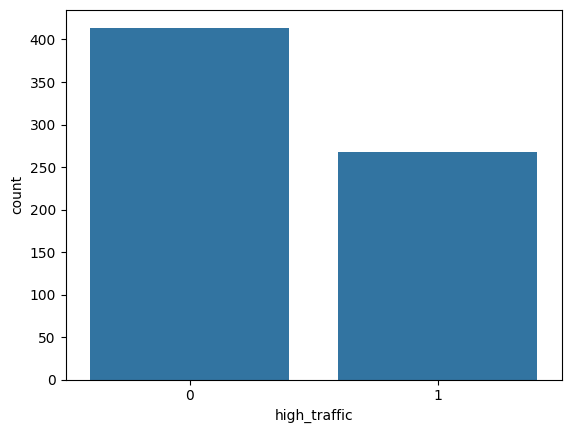

In [44]:
# Let's print out countplot to know how many samples belong to class #0 and #1
sns.countplot(x = data_clean['high_traffic'])


In [45]:
data_labelled_y = data_labelled['high_traffic']
data_labelled_X = data_labelled.drop('high_traffic', axis=1)
data_unlabelled_y = data_unlabelled['high_traffic']
data_unlabelled_X = data_unlabelled.drop('high_traffic', axis=1)

In [46]:
from sklearn.model_selection import train_test_split
labeled_data_X_train,labeled_data_X_test, labeled_data_y_train, labeled_data_y_test = train_test_split(data_labelled_X , data_labelled_y , test_size = 0.2, random_state =0)

In [47]:
labeled_data_X_train.shape ,labeled_data_X_test.shape, labeled_data_y_train.shape, labeled_data_y_test.shape

((331, 19), (83, 19), (331,), (83,))

In [48]:
labeled_data_X_train

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
713,720.31,6.88,0.76,17.24,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
53,74.56,47.47,16.36,45.15,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
714,1044.25,30.87,3.70,5.37,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
338,482.51,26.21,5.29,18.93,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30,215.98,52.66,6.25,32.32,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,878.70,7.70,3.87,35.12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
454,18.23,22.32,5.14,18.37,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
270,457.35,12.74,4.83,21.43,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
112,719.02,49.37,1.22,5.72,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Feature scaling

In [49]:
#Feature scaling

sc= StandardScaler()
labeled_data_X_train.iloc[ :, :4] = sc.fit_transform(labeled_data_X_train.iloc[ :, :4].values)
labeled_data_X_test.iloc[ :, :4] = sc.transform(labeled_data_X_test.iloc[ :, :4].values)
#data_unlabelled_X.iloc[ :, :4] = sc.transform(data_unlabelled_X.iloc[ :, :4].values)

In [50]:
labeled_data_X_train

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
713,1.108623,-0.963220,-1.036831,0.063111,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
53,-1.040184,0.987669,2.576155,2.021273,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
714,2.186570,0.189818,-0.355922,-0.769687,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
338,0.317316,-0.034157,0.012325,0.181681,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30,-0.569593,1.237117,0.234662,1.121121,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,1.635684,-0.923808,-0.316550,1.317569,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
454,-1.227628,-0.221123,-0.022416,0.142391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
270,0.233594,-0.681569,-0.094212,0.357080,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
112,1.104330,1.078989,-0.930294,-0.745131,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [51]:
labeled_data_X_test

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
826,-0.527898,0.646420,-0.013152,-0.827218,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
396,-1.074125,-0.751742,1.675224,0.317791,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
532,0.490985,-1.246313,-1.138736,-0.924039,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
779,-1.247527,-0.757029,0.510268,0.740153,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
720,-0.492658,2.591061,-1.143368,0.484771,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,-0.410000,-1.246794,0.503320,-0.228754,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
233,0.454348,-1.198731,-1.046095,1.768697,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
16,0.223345,-1.204018,-0.529623,3.138218,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
58,-1.267560,1.418316,0.084121,-0.997707,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [52]:
data_unlabelled_X.iloc[ :, :4] = sc.transform(data_unlabelled_X.iloc[ :, :4].values)
data_unlabelled_X

,calories,carbohydrate,sugar,protein,category_Beverages,category_Breakfast,category_Chicken,category_Chicken Breast,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable,servings_1,servings_2,servings_4,servings_6
2,1.754080,0.757446,-0.497199,-0.944385,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-1.198279,-1.204979,-1.027567,-1.109261,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,-0.676209,1.010739,1.045268,2.130722,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
7,-0.292868,-1.141535,-1.120208,1.126734,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
10,-0.722197,-0.446540,-0.263281,-1.082600,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,-0.492226,0.285945,-0.432351,1.703448,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
924,-0.625430,-1.260732,-0.260965,-1.138026,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
929,-0.120697,-1.229491,-1.087783,-1.142236,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
932,2.096958,2.797252,-0.816809,-1.016650,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


## Part 2: Model Training

## Baseline model: Logistic Regression

In [53]:
#Training the data using LogisticRegression using X_train, y_train
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_LR = LogisticRegression()
clf_LR.fit(data_before_split_X.iloc[5:], data_before_split_y.iloc[5:])
y_pred_LR = clf_LR.predict(data_before_split_X.iloc[1:5])
accuracy = accuracy_score(data_before_split_y.iloc[1:5], y_pred_LR)
print(f"Accuracy: {accuracy}")

print(y_pred_LR)
from sklearn.metrics import classification_report
print(classification_report(data_before_split_y.iloc[1:5], y_pred_LR))


Accuracy: 0.75
[0 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Semi-Supervised model: RandomForestClassifier

In [54]:

from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier
clf_RF = SelfTrainingClassifier(RandomForestClassifier(), threshold = 0.85)
clf_RF.fit(labeled_data_X_train, labeled_data_y_train)
#predict the unlabeled_data_imputed_y uisng unlabeled_data_imputed_X
unlabeled_data_imputed_y_pred = clf_RF.predict(data_unlabelled_X)
unlabeled_data_imputed_y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [55]:
X_train_updated = pd.concat([labeled_data_X_train, data_unlabelled_X])
y_train_updated = pd.concat([labeled_data_y_train, pd.Series(unlabeled_data_imputed_y_pred)])

### Evaluation

In [56]:
from sklearn.metrics import classification_report
y_pred = clf_RF.predict(labeled_data_X_test)
accuracy = accuracy_score(labeled_data_y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(labeled_data_y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



In [57]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf_RF, X = labeled_data_X_train, y=labeled_data_y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/semi_supervised/_self_training.py:288: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/usr/local/lib/pytho

1.0
0.0


## Alternative strategy:
Treat the objective as identifying 'Low-Traffic-Recipe' anomaly but this alternative approach ignores the use of labelled target value.

### Anomaly detection: OneClassSVM

In [58]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(kernel='rbf', nu=0.1)

# Train the model on the scaled labeled features (the 'High' traffic data)
one_class_svm.fit(labeled_data_X_train)

# Predict whether the unlabeled data points is outliers (-1)
unlabeled_predictions_svm = one_class_svm.predict(data_unlabelled_X)

# Display the predictions for few unlabeled recipes
print("Predictions for unlabeled data (1: Inlier, -1: Outlier):")
print(unlabeled_predictions_svm[:20])

# Get a decision function score. Negative scores indicate outliers
unlabeled_decision_scores = one_class_svm.decision_function(data_unlabelled_X)
print("\nDecision function scores for unlabeled Target's data. Increasing negative value imply more likely outlier):")
print(unlabeled_decision_scores[:20])

Predictions for unlabeled data (1: Inlier, -1: Outlier):
[-1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1]

Decision function scores for unlabeled Target's data. Increasing negative value imply more likely outlier):
[-0.00611127 -0.24685822 -0.16000512  0.16259098  0.21923194  0.23308673
  0.23451456  0.06223465  0.6719981   0.29378329 -0.40034363  0.08244491
 -0.35251976  0.05402169  0.42310762  0.72034976  0.34909567 -0.14285592
 -0.0159584  -0.29087818]
